In [63]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [5]:
file = os.path.join('output/clean_data.csv')
df = pd.read_csv(file)
df

,Player,PER,Player Name,Height,Weight,Age,School,Team Name,City,Birth Month
0,Precious Achiuwa,12.7,Precious Achiuwa,80.0,225.0,22.0,Memphis,Toronto Raptors,Toronto,SEP
1,Steven Adams,17.6,Steven Adams,83.0,265.0,28.0,Pittsburgh,Memphis Grizzlies,Memphis,JUL
2,Bam Adebayo,21.8,Bam Adebayo,81.0,255.0,24.0,Kentucky,Miami Heat,Miami,JUL
3,Santi Aldama,10.2,Santi Aldama,83.0,215.0,21.0,Loyola-Maryland,Memphis Grizzlies,Memphis,JAN
4,LaMarcus Aldridge,19.6,LaMarcus Aldridge,83.0,250.0,36.0,Texas-Austin,Brooklyn Nets,Brooklyn,JUL
...,...,...,...,...,...,...,...,...,...,...
463,Gabe York,12.7,Gabe York,75.0,190.0,28.0,Arizona,Indiana Pacers,Indiana,AUG
464,Thaddeus Young,17.0,Thaddeus Young,80.0,235.0,34.0,Georgia Tech,Toronto Raptors,Toronto,JUN
465,Trae Young,25.4,Trae Young,73.0,164.0,23.0,Oklahoma,Atlanta Hawks,Atlanta,SEP
466,Omer Yurtseven,17.4,Omer Yurtseven,83.0,275.0,24.0,Georgetown,Miami Heat,Miami,JUN


In [6]:
df.describe()

,PER,Height,Weight,Age
count,468.000000,468.000000,468.000000,468.000000
mean,13.432479,78.061966,214.410256,26.079060
std,5.904737,3.236305,23.640565,4.338482
min,-45.200000,69.000000,160.000000,19.000000
25%,10.600000,76.000000,197.000000,23.000000
50%,13.300000,78.000000,213.000000,25.000000
75%,16.425000,80.000000,230.000000,29.000000
max,36.900000,86.000000,282.000000,42.000000


The optimal age based on representation during the 2021-22 NBA season was 25.0 years old.
There were 40 players who were the optimal age of 25.0 years old during the 2021-22 NBA season.


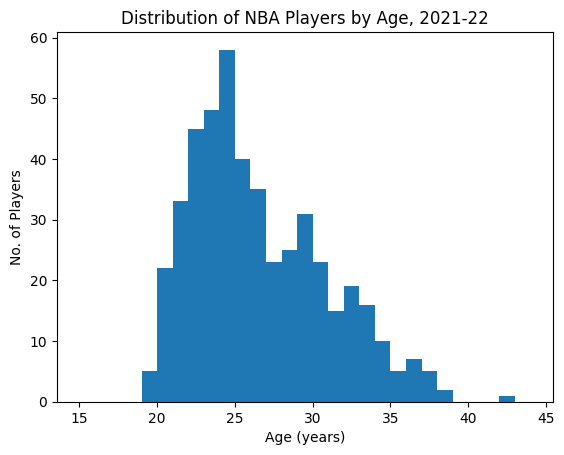

In [88]:
per = df['PER']
height = df['Height']
weight = df['Weight']
age = df['Age'].astype(int)
n = len(df)
birth_month = df['Birth Month']

# distribution by age

# use median as best measure of central tendency for data that skews
optimal_age = np.median(age)

print(f'The optimal age based on representation during the 2021-22 NBA season was {optimal_age} years old.')

age_df = df.loc[df['Age'] == optimal_age]
print(f'There were {len(age_df)} players who were the optimal age of {optimal_age} years old during the 2021-22 NBA season.')

# plot histogram
plt.hist(age, bins=range(15,45,1))
plt.xlabel('Age (years)')
plt.ylabel('No. of Players')
plt.title(f'Distribution of NBA Players by Age, 2021-22')
plt.show()


The optimal height based on representation during the 2021-22 NBA season was 78 inches tall.
There were 56 players who were the optimal height of 78 inches tall during the 2021-22 NBA season.


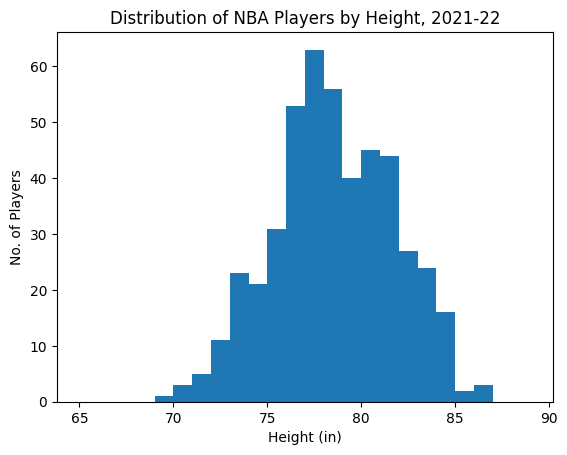

In [84]:
# distribution by height

# use mean as best measure of central tendency for normally distributed
optimal_height = round(np.mean(height))

print(f'The optimal height based on representation during the 2021-22 NBA season was {round(optimal_height,1)} inches tall.')

height_df = df.loc[df['Height'] == optimal_height]
print(f'There were {len(height_df)} players who were the optimal height of {optimal_height} inches tall during the 2021-22 NBA season.')

plt.hist(height, bins=range(65,90,1))
plt.xlabel('Height (in)')
plt.ylabel('No. of Players')
plt.title(f'Distribution of NBA Players by Height, 2021-22')
plt.show()

The optimal weight based on representation during the 2021-22 NBA season was 214 pounds.
There were 5 players who were the optimal weight of 214 pounds during the 2021-22 NBA season.


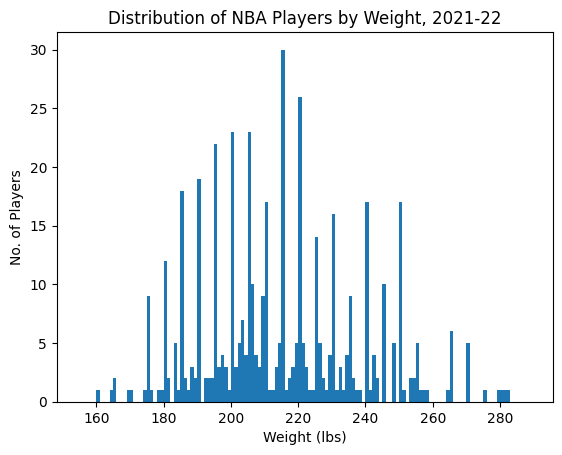

In [86]:
# distribution by weight

# use mean as best measure of central tendency for normally distributed
optimal_weight = round(np.mean(weight))

print(f'The optimal weight based on representation during the 2021-22 NBA season was {round(optimal_weight)} pounds.')

weight_df = df.loc[df['Weight'] == optimal_weight]
print(f'There were {len(weight_df)} players who were the optimal weight of {optimal_weight} pounds during the 2021-22 NBA season.')

plt.hist(weight, bins=range(155,290,1))
plt.xlabel('Weight (lbs)')
plt.ylabel('No. of Players')
plt.title(f'Distribution of NBA Players by Weight, 2021-22')
plt.show()

In [87]:
# find a player matching all optimum measurements
optimal_df = df.loc[(df['Age'] == optimal_age) & (df['Height'] == optimal_height) & (df['Weight'] == optimal_weight)]
optimal_df

,Player,PER,Player Name,Height,Weight,Age,School,Team Name,City,Birth Month


In [ ]:
# distribution by birth month

# Alternate hypothesis: More NBA players will be born in the first quarter (Sep - Nov) of the year 
# as defined by the USA Basketball League due to cumulative advantages of being older than teammates 
# in youth leagues culminating in greater opportunity for success

# Null hypothesis: No difference in distribution of NBA players by birth months (grouped by quarters)

#working on this...

match birth_month:
    

# optimal_height = round(np.mean(height))

# print(f'The optimal height based on representation during the 2021-22 NBA season was {round(optimal_height,1)} inches tall.')

# height_df = df.loc[df['Height'] == optimal_height]
# print(f'There were {len(height_df)} players who were the optimal height of {optimal_height} inches tall during the 2021-22 NBA season.')

# plt.hist(height, bins=range(65,90,1))
# plt.xlabel('Height (in)')
# plt.ylabel('No. of Players')
# plt.title(f'Distribution of NBA Players by Height, 2021-22')
# plt.show()

The correlation between age and performance (PER) is 0.13


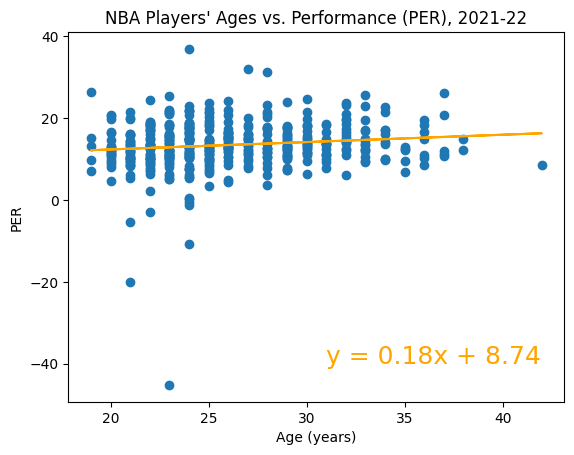

In [57]:
# scatter plot and linear regression model - age during season vs PER(formance)
x = age
y = per

corr=round(st.pearsonr(x,y)[0],2)
print(f'The correlation between age and performance (PER) is {corr}')

line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y = {str(round(line[0],2))}x + {str(round(line[1],2))}'

plt.scatter(x,y)
plt.xlabel('Age (years)')
plt.ylabel('PER')
plt.title("NBA Players' Ages vs. Performance (PER), 2021-22")
plt.plot(x,y_values,color="orange")
plt.annotate(line_eq,(31,-40),fontsize=18,color="orange")
plt.show()

The correlation between age and performance (PER) is 0.23


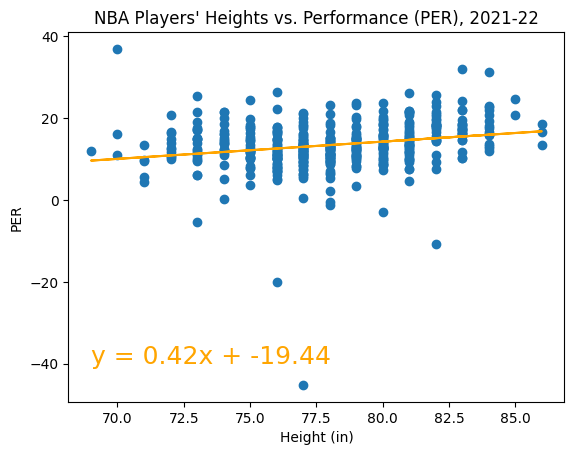

In [58]:
# scatter plot and linear regression model - height vs PER(formance)
x = height
y = per

corr=round(st.pearsonr(x,y)[0],2)
print(f'The correlation between age and performance (PER) is {corr}')

line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y = {str(round(line[0],2))}x + {str(round(line[1],2))}'

plt.scatter(x,y)
plt.xlabel('Height (in)')
plt.ylabel('PER')
plt.title("NBA Players' Heights vs. Performance (PER), 2021-22")
plt.plot(x,y_values,color="orange")
plt.annotate(line_eq,(69,-40),fontsize=18,color="orange")
plt.show()

The correlation between weight and performance (PER) is 0.26


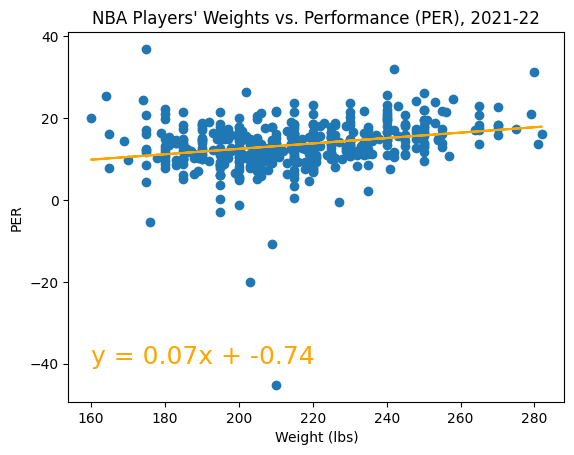

In [60]:
# scatter plot and linear regression model - weight vs PER(formance)
x = weight
y = per

corr=round(st.pearsonr(x,y)[0],2)
print(f'The correlation between weight and performance (PER) is {corr}')

line = st.linregress(x,y)
y_values = x*line[0]+line[1]
line_eq = f'y = {str(round(line[0],2))}x + {str(round(line[1],2))}'

plt.scatter(x,y)
plt.xlabel('Weight (lbs)')
plt.ylabel('PER')
plt.title("NBA Players' Weights vs. Performance (PER), 2021-22")
plt.plot(x,y_values,color="orange")
plt.annotate(line_eq,(160,-40),fontsize=18,color="orange")
plt.show()